# Pandas

The `pandas` library is based on numpy and extends the numpy functionality, and is currently one of the most widely used tools for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

Le principali  features di `pandas`:

* A fast and efficient `DataFrame` object for data manipulation with integrated indexing;
* Tools for reading and writing data in different formats (CSV, Excel, SQL, HDF5);
* Label-based slicing, fancy indexing, and subsetting of large data sets;
* Smart data alignment and management of missing data;
* Aggregating and transforming data with "group-by", joining and merging; 
* Date and time series;
* Highly optimized for performance

In [2]:
import pandas as pd
import numpy as np

## Series
Pandas Series = numpy array di dati (anche non omogenei) con indice (label) su ogni elemento = dictionary versione pandas = colonna del dataframe. Due elementi possono avere lo stesso indice.

One of the most important examples are the time-series, with time as label

Pandas Series [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [25]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

sr = pd.Series(np.arange(6), index=tuple(letters[:6]), dtype=float)
print("series:\n", sr, '\n')
print("indices:\n", sr.index, '\n')
print("values:", sr.values, '\n') # values of the Series are a numpy array
print("type:\n", sr.dtype, '\n')

# Access to elements: return pandas serie
print("element by index     :", sr['c'], '\n')
print("element by attribute :", sr.f, '\n') #l'indice e un metodo (se e ben definito senza caratteri speciali)
print("series subset:\n", sr[['c', 'd', 'a']], '\n') 

series:
 a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
dtype: float64 

indices:
 Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object') 

values: [0. 1. 2. 3. 4. 5.] 

type:
 float64 

element by index     : 2.0 

element by attribute : 5.0 

series subset:
 c    2.0
d    3.0
a    0.0
dtype: float64 



In [26]:
# Slicing come per numpy array e liste
print(sr[:3], '\n') #fino al terzo
print(sr[7:], '\n') #dal 7th in poi
print(sr[::2], '\n') #tutti a step di 2
print(sr[sr > 3], '\n') 
print(np.exp(sr), '\n') #esp di ogni valore
print(np.mean(sr), np.std(sr), '\n') 

a    0.0
b    1.0
c    2.0
dtype: float64 

Series([], dtype: float64) 

a    0.0
c    2.0
e    4.0
dtype: float64 

e    4.0
f    5.0
dtype: float64 

a      1.000000
b      2.718282
c      7.389056
d     20.085537
e     54.598150
f    148.413159
dtype: float64 

2.5 1.707825127659933 



In [30]:
# Serie dai dictionary
d = {'b' : 1, 'a' : 'cat', 'c' : [2, 3]}

so = pd.Series(d)
print(so, '\n')

b         1
a       cat
c    [2, 3]
dtype: object 



Le serie possono avere dati non omogonei, in questo caso dtype = `object`. Se l'operazione non e consentita ritorna `NaN`

Le operazioni tra le serie sono automaticamente allineate rispetto agli indici.

s['a'] + t['a']  -> se faccio s + t


Quando qualche indice corrispondente manca, l'operazione ritorna `NaN`

In [41]:
s = pd.Series(np.arange(5), index=tuple(letters[:5]))
t = pd.Series(np.arange(6), index=tuple(letters[1:7]))
print(s,'\n',t,'\n')

print("s+t: \n", s+t, '\n')

#estremi NaN
print( s[1:] + s[:-1] )

a    0
b    1
c    2
d    3
e    4
dtype: int64 
 b    0
c    1
d    2
e    3
f    4
g    5
dtype: int64 

s+t: 
 a    NaN
b    1.0
c    3.0
d    5.0
e    7.0
f    NaN
g    NaN
dtype: float64 

a    NaN
b    2.0
c    4.0
d    6.0
e    NaN
dtype: float64


### Date and Time series

Per creare delle time series, `DatetimeIndex` da usare come indice delle serie o dataframe, in Pandas usare `pd.data_range()`. 

Time Series Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

In [79]:
# Datetime module
import datetime as dt

date = dt.date.today()
print("Today:", date)

#Date and time definitions
date = dt.datetime(2020, 11, 12, 10, 45, 10, 15) # year, month, day, hour, minutes, seconds, and us
print("Date and time:", date) 
# anche se date non e datetime, funziona lo stesso 
# date = '9/11/2020 14:45:00'
# date = 'Nov 9 2020'

# DatetimeIndex
days = pd.date_range(date, periods=7, freq='D')
print("7 days range:", days)

seconds = pd.date_range(date, periods=3600, freq='s')
print("1 hour in seconds:", seconds)

Today: 2021-11-13
Date and time: 2020-11-12 10:45:10.000015
7 days range: DatetimeIndex(['2020-11-12 10:45:10.000015', '2020-11-13 10:45:10.000015',
               '2020-11-14 10:45:10.000015', '2020-11-15 10:45:10.000015',
               '2020-11-16 10:45:10.000015', '2020-11-17 10:45:10.000015',
               '2020-11-18 10:45:10.000015'],
              dtype='datetime64[ns]', freq='D')
1 hour in seconds: DatetimeIndex(['2020-11-12 10:45:10.000015', '2020-11-12 10:45:11.000015',
               '2020-11-12 10:45:12.000015', '2020-11-12 10:45:13.000015',
               '2020-11-12 10:45:14.000015', '2020-11-12 10:45:15.000015',
               '2020-11-12 10:45:16.000015', '2020-11-12 10:45:17.000015',
               '2020-11-12 10:45:18.000015', '2020-11-12 10:45:19.000015',
               ...
               '2020-11-12 11:45:00.000015', '2020-11-12 11:45:01.000015',
               '2020-11-12 11:45:02.000015', '2020-11-12 11:45:03.000015',
               '2020-11-12 11:45:04.000015',

Functions like `pd.to_datetime` can be used to convert between different formats and, for instance, when reading the time stored as a string from a dataset:

In [86]:
# Timestamp .value = nanoseconds from January 1st 1970
tstamp = pd.Timestamp("11/9/2021") 
print("Timestamp:", tstamp.value)

Timestamp: 1636416000000000000


In [87]:
# Date from generic data format
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print("Time:", ts, ", timestamp:", ts.value) #Timestamp automatically created

ts = pd.to_datetime('12-11-2010 10:39:01', format='%d-%m-%Y %H:%M:%S')
print("Time:", ts, ", timestamp:", ts.value)

Time: 2010-11-12 00:00:00 , timestamp: 1289520000000000000
Time: 2010-11-12 10:39:01 , timestamp: 1289558341000000000


Esempio di Time Serie in Pandas con indice anni

In [108]:
tseries = pd.Series(np.arange(7), index=pd.date_range('10/10/2021', periods=7, freq='Y'))
print("time series:\n", tseries, '\n')
# Extracting elements (estremi inclusi)
print("slice by date range:\n", tseries['2020-11-13' : '2020-11-16':2], '\n') 

time series:
 2021-12-31    0
2022-12-31    1
2023-12-31    2
2024-12-31    3
2025-12-31    4
2026-12-31    5
2027-12-31    6
Freq: A-DEC, dtype: int64 

slice by date range:
 Series([], Freq: 2A-DEC, dtype: int64) 



`pd.to_datetime` a partire da una data precisa

In [106]:
print(pd.to_datetime(np.arange(5), unit='D', origin=pd.Timestamp('1980-02-03')))

DatetimeIndex(['1980-02-03', '1980-02-04', '1980-02-05', '1980-02-06',
               '1980-02-07'],
              dtype='datetime64[ns]', freq=None)


## DataFrame
Un DataFrame e come una tabella di excel, con records (rows) omogenei con index e diverse features (variabili, colonne)

We have labeled axes (rows and columns) and arithmetic operations **align on both row and column labels**. Each column in a DataFrame is a Series object. Missing elements are NaN


Link to the official [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

### DataFrame creation

In [28]:
entries = 10
columns = ['A', 'B', 'C', 'D']
dates = pd.date_range(dt.date.today(), freq='h', periods=entries) # days/month/year
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=columns)
df

,A,B,C,D
2021-11-14 00:00:00,-2.494124,-1.140598,-0.153322,-0.952541
2021-11-14 01:00:00,1.033724,2.132156,0.734785,-0.090263
2021-11-14 02:00:00,-0.209065,-0.401325,0.304834,1.378006
2021-11-14 03:00:00,-0.521875,-0.272941,-1.145209,0.795891
2021-11-14 04:00:00,-0.194879,-0.283270,-0.293066,1.217228
2021-11-14 05:00:00,-2.167251,-1.350598,-0.603714,-0.000827
2021-11-14 06:00:00,-0.738615,-0.145872,1.080924,-0.110051
2021-11-14 07:00:00,-0.430573,-0.563407,-1.588655,1.086225
2021-11-14 08:00:00,0.152031,0.301528,0.955981,1.112832
2021-11-14 09:00:00,-1.121832,-0.083107,-0.840960,-0.497276


In [27]:
#dataframe from dictionary
df1 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.to_datetime('20130102'),
    'C' : pd.Series(3, index=range(4)), 
    'D' : np.arange(7, 11),
    'E' : pd.Categorical(["test", "train", "test", "train"]),
})
df1

,A,B,C,D,E
0,1.0,2013-01-02,3,7,test
1,1.0,2013-01-02,3,8,train
2,1.0,2013-01-02,3,9,test
3,1.0,2013-01-02,3,10,train


### Viewing Data

In [35]:
df.head()

,A,B,C,D
2021-11-14 00:00:00,-2.494124,-1.140598,-0.153322,-0.952541
2021-11-14 01:00:00,1.033724,2.132156,0.734785,-0.090263
2021-11-14 02:00:00,-0.209065,-0.401325,0.304834,1.378006
2021-11-14 03:00:00,-0.521875,-0.272941,-1.145209,0.795891
2021-11-14 04:00:00,-0.194879,-0.283270,-0.293066,1.217228


In [36]:
df.tail(4)

,A,B,C,D
2021-11-14 06:00:00,-0.738615,-0.145872,1.080924,-0.110051
2021-11-14 07:00:00,-0.430573,-0.563407,-1.588655,1.086225
2021-11-14 08:00:00,0.152031,0.301528,0.955981,1.112832
2021-11-14 09:00:00,-1.121832,-0.083107,-0.840960,-0.497276


In [37]:
df.index

DatetimeIndex(['2021-11-14 00:00:00', '2021-11-14 01:00:00',
               '2021-11-14 02:00:00', '2021-11-14 03:00:00',
               '2021-11-14 04:00:00', '2021-11-14 05:00:00',
               '2021-11-14 06:00:00', '2021-11-14 07:00:00',
               '2021-11-14 08:00:00', '2021-11-14 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [40]:
df.values #numpy 2D array con i valori

array([[-2.49412377e+00, -1.14059795e+00, -1.53321735e-01,
        -9.52541442e-01],
       [ 1.03372371e+00,  2.13215629e+00,  7.34784617e-01,
        -9.02630073e-02],
       [-2.09065149e-01, -4.01325069e-01,  3.04833925e-01,
         1.37800626e+00],
       [-5.21874819e-01, -2.72941483e-01, -1.14520885e+00,
         7.95891309e-01],
       [-1.94878525e-01, -2.83269990e-01, -2.93066069e-01,
         1.21722829e+00],
       [-2.16725082e+00, -1.35059825e+00, -6.03714380e-01,
        -8.26545960e-04],
       [-7.38614677e-01, -1.45871763e-01,  1.08092449e+00,
        -1.10051335e-01],
       [-4.30573083e-01, -5.63406651e-01, -1.58865462e+00,
         1.08622483e+00],
       [ 1.52031110e-01,  3.01528158e-01,  9.55981096e-01,
         1.11283179e+00],
       [-1.12183195e+00, -8.31074591e-02, -8.40960377e-01,
        -4.97276196e-01]])

In [42]:
df.describe() #summary of dataframe

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.669246,-0.180743,-0.154840,0.393922
std,1.047426,0.948497,0.912371,0.820257
min,-2.494124,-1.350598,-1.588655,-0.952541
25%,-1.026028,-0.522886,-0.781649,-0.105104
50%,-0.476224,-0.278106,-0.223194,0.397532
75%,-0.198425,-0.098799,0.627297,1.106180
max,1.033724,2.132156,1.080924,1.378006


In [44]:
df.T #Scambia features con index

,2021-11-14 00:00:00,2021-11-14 01:00:00,2021-11-14 02:00:00,2021-11-14 03:00:00,2021-11-14 04:00:00,2021-11-14 05:00:00,2021-11-14 06:00:00,2021-11-14 07:00:00,2021-11-14 08:00:00,2021-11-14 09:00:00
A,-2.494124,1.033724,-0.209065,-0.521875,-0.194879,-2.167251,-0.738615,-0.430573,0.152031,-1.121832
B,-1.140598,2.132156,-0.401325,-0.272941,-0.283270,-1.350598,-0.145872,-0.563407,0.301528,-0.083107
C,-0.153322,0.734785,0.304834,-1.145209,-0.293066,-0.603714,1.080924,-1.588655,0.955981,-0.840960
D,-0.952541,-0.090263,1.378006,0.795891,1.217228,-0.000827,-0.110051,1.086225,1.112832,-0.497276


In [48]:
df.sort_index(axis=1, ascending=False) #axis 1 = row

,D,C,B,A
2021-11-14 00:00:00,-0.952541,-0.153322,-1.140598,-2.494124
2021-11-14 01:00:00,-0.090263,0.734785,2.132156,1.033724
2021-11-14 02:00:00,1.378006,0.304834,-0.401325,-0.209065
2021-11-14 03:00:00,0.795891,-1.145209,-0.272941,-0.521875
2021-11-14 04:00:00,1.217228,-0.293066,-0.283270,-0.194879
2021-11-14 05:00:00,-0.000827,-0.603714,-1.350598,-2.167251
2021-11-14 06:00:00,-0.110051,1.080924,-0.145872,-0.738615
2021-11-14 07:00:00,1.086225,-1.588655,-0.563407,-0.430573
2021-11-14 08:00:00,1.112832,0.955981,0.301528,0.152031
2021-11-14 09:00:00,-0.497276,-0.840960,-0.083107,-1.121832


In [51]:
df.sort_values(by="C", ascending=False) #ordina rispetto a colonna C

,A,B,C,D
2021-11-14 06:00:00,-0.738615,-0.145872,1.080924,-0.110051
2021-11-14 08:00:00,0.152031,0.301528,0.955981,1.112832
2021-11-14 01:00:00,1.033724,2.132156,0.734785,-0.090263
2021-11-14 02:00:00,-0.209065,-0.401325,0.304834,1.378006
2021-11-14 00:00:00,-2.494124,-1.140598,-0.153322,-0.952541
2021-11-14 04:00:00,-0.194879,-0.283270,-0.293066,1.217228
2021-11-14 05:00:00,-2.167251,-1.350598,-0.603714,-0.000827
2021-11-14 09:00:00,-1.121832,-0.083107,-0.840960,-0.497276
2021-11-14 03:00:00,-0.521875,-0.272941,-1.145209,0.795891
2021-11-14 07:00:00,-0.430573,-0.563407,-1.588655,1.086225


## Selection

### Slicing

DataFrame slicing per selezionare righe e colonne:

OSS: ritorna **view**

In [80]:
# select a column
print(df['A'], '\n', '\n') # Returns a Series (a column)

#print(df.A, '\n') equivalente

2021-11-14 00:00:00   -2.494124
2021-11-14 01:00:00    1.033724
2021-11-14 02:00:00   -0.209065
2021-11-14 03:00:00   -0.521875
2021-11-14 04:00:00   -0.194879
2021-11-14 05:00:00   -2.167251
2021-11-14 06:00:00   -0.738615
2021-11-14 07:00:00   -0.430573
2021-11-14 08:00:00    0.152031
2021-11-14 09:00:00   -1.121832
Freq: H, Name: A, dtype: float64 
 



In [61]:
# selecting rows by position. Returns a copy of df
print(df[0:3], '\n')

# or by index range, estremi inclusi 
print(df["2021-11-14 01:00:00" : "2021-11-14 05:00:00"])

                            A         B         C         D
2021-11-14 00:00:00 -2.494124 -1.140598 -0.153322 -0.952541
2021-11-14 01:00:00  1.033724  2.132156  0.734785 -0.090263
2021-11-14 02:00:00 -0.209065 -0.401325  0.304834  1.378006 

                            A         B         C         D
2021-11-14 01:00:00  1.033724  2.132156  0.734785 -0.090263
2021-11-14 02:00:00 -0.209065 -0.401325  0.304834  1.378006
2021-11-14 03:00:00 -0.521875 -0.272941 -1.145209  0.795891
2021-11-14 04:00:00 -0.194879 -0.283270 -0.293066  1.217228
2021-11-14 05:00:00 -2.167251 -1.350598 -0.603714 -0.000827


### Selection by label

Select rows and column with`.loc[]` and passes index and feautures

OSS: `.loc[]` returns a **copy** of the DataFrame.

In [99]:
# get 4th record
dfs = df.loc[dates[4]] #dates is the series of index
print(dfs, '\n')

A   -0.194879
B   -0.283270
C   -0.293066
D    1.217228
Name: 2021-11-14 04:00:00, dtype: float64 



In [100]:
# select all row, just column A and B
dfa = df.loc[:, ['A','B']]
print("loc make a copy! Indeed: ", np.may_share_memory(df, dfa))
dfa #COPY!

loc make a copy! Indeed:  False


,A,B
2021-11-14 00:00:00,-2.494124,-1.140598
2021-11-14 01:00:00,1.033724,2.132156
2021-11-14 02:00:00,-0.209065,-0.401325
2021-11-14 03:00:00,-0.521875,-0.272941
2021-11-14 04:00:00,-0.194879,-0.283270
2021-11-14 05:00:00,-2.167251,-1.350598
2021-11-14 06:00:00,-0.738615,-0.145872
2021-11-14 07:00:00,-0.430573,-0.563407
2021-11-14 08:00:00,0.152031,0.301528
2021-11-14 09:00:00,-1.121832,-0.083107


In [88]:
# select first 4th row, column A and B
df.loc[dates[0]:dates[4], ['A','B']]

,A,B
2021-11-14 00:00:00,-2.494124,-1.140598
2021-11-14 01:00:00,1.033724,2.132156
2021-11-14 02:00:00,-0.209065,-0.401325
2021-11-14 03:00:00,-0.521875,-0.272941
2021-11-14 04:00:00,-0.194879,-0.283270


In [91]:
# select individual element
print(df.loc[dates[1], 'A'], '\n')

1.0337237076684826 



The `.at()` = `.loc[]` for single element selection.

In [92]:
print(df.at[dates[1], 'A'])

1.0337237076684826


### Selecting by position

`.iloc[]` per selezionare rows and columns con gli indici numerici

OSS: `.iloc[]` returns a **view**!

Views and copy in pandas [here](https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html).

In [112]:
#select single record
print(df.iloc[3], '\n')

#multiple rows and columns select
print(df.iloc[3:5, 0:2], '\n')
print(df.iloc[[1, 2, 4], [0, 2]])

A   -0.521875
B   -0.272941
C   -1.145209
D    0.795891
Name: 2021-11-14 03:00:00, dtype: float64 

                            A         B
2021-11-14 03:00:00 -0.521875 -0.272941
2021-11-14 04:00:00 -0.194879 -0.283270 

                            A         C
2021-11-14 01:00:00  1.033724  0.734785
2021-11-14 02:00:00 -0.209065  0.304834
2021-11-14 04:00:00 -0.194879 -0.293066


In [115]:
# slicing rows
print(df.iloc[1:3, :])

# slicing columns
df.iloc[:, 1:3]

                            A         B         C         D
2021-11-14 01:00:00  1.033724  2.132156  0.734785 -0.090263
2021-11-14 02:00:00 -0.209065 -0.401325  0.304834  1.378006


,B,C
2021-11-14 00:00:00,-1.140598,-0.153322
2021-11-14 01:00:00,2.132156,0.734785
2021-11-14 02:00:00,-0.401325,0.304834
2021-11-14 03:00:00,-0.272941,-1.145209
2021-11-14 04:00:00,-0.283270,-0.293066
2021-11-14 05:00:00,-1.350598,-0.603714
2021-11-14 06:00:00,-0.145872,1.080924
2021-11-14 07:00:00,-0.563407,-1.588655
2021-11-14 08:00:00,0.301528,0.955981
2021-11-14 09:00:00,-0.083107,-0.840960


`.iat[]` per selezionare singoli elementi in stile `.iloc[]` (view?):

In [118]:
#iat = iloc per singolo elemento
print(df.iloc[1,1])
print(df.iat[1,1])

2.1321562874122635
2.1321562874122635


### Masks
Si possono applicare masks ai dataframe come in numpy. 

OSS: le masks ritornano **copy** dei dataframe


In [130]:
#Select record with B>1
df[df['B'] > 0]

,A,B,C,D
2021-11-14 01:00:00,1.033724,2.132156,0.734785,-0.090263
2021-11-14 08:00:00,0.152031,0.301528,0.955981,1.112832


In [134]:
# Applica il filtro ad ogni elemento. I false sono NaN
dfc = df[df > 1]

dfc.iat[0, 0] = -999 #modifica elemento, view
dfc

,A,B,C,D
2021-11-14 00:00:00,-999.000000,NaN,NaN,NaN
2021-11-14 01:00:00,1.033724,2.132156,NaN,NaN
2021-11-14 02:00:00,NaN,NaN,NaN,1.378006
2021-11-14 03:00:00,NaN,NaN,NaN,NaN
2021-11-14 04:00:00,NaN,NaN,NaN,1.217228
2021-11-14 05:00:00,NaN,NaN,NaN,NaN
2021-11-14 06:00:00,NaN,NaN,1.080924,NaN
2021-11-14 07:00:00,NaN,NaN,NaN,1.086225
2021-11-14 08:00:00,NaN,NaN,NaN,1.112832
2021-11-14 09:00:00,NaN,NaN,NaN,NaN


### Assignement

In [192]:
# copia del dataframe originario
dfa = df.copy()

# set single value (by position)
dfa.at[dates[0], 'A'] = -1

# set column
dfa.loc[:, 'D'] = np.array([5] * len(dfa)) #array rep 5

# defining a new column
dfa['E'] = np.arange(10)
dfa['E prime'] = pd.Series(np.arange(len(dfa))*2, index=dfa.index) #stessi indici del database

#inverte valori negativi
dfa[dfa <= 0] = -dfa

dfa

,A,B,C,D,E,E prime
2021-11-14 00:00:00,1.000000,1.140598,0.153322,5,0,0
2021-11-14 01:00:00,1.033724,2.132156,0.734785,5,1,2
2021-11-14 02:00:00,0.209065,0.401325,0.304834,5,2,4
2021-11-14 03:00:00,0.521875,0.272941,1.145209,5,3,6
2021-11-14 04:00:00,0.194879,0.283270,0.293066,5,4,8
2021-11-14 05:00:00,2.167251,1.350598,0.603714,5,5,10
2021-11-14 06:00:00,0.738615,0.145872,1.080924,5,6,12
2021-11-14 07:00:00,0.430573,0.563407,1.588655,5,7,14
2021-11-14 08:00:00,0.152031,0.301528,0.955981,5,8,16
2021-11-14 09:00:00,1.121832,0.083107,0.840960,5,9,18


### Application of a function

In [193]:
def mycos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta) 

dfa['cosine'] = dfa["E"].apply(mycos)
dfa['test'] = mycos(dfa['A'])

dfa

,A,B,C,D,E,E prime,cosine,test
2021-11-14 00:00:00,1.000000,1.140598,0.153322,5,0,0,1.000000,0.999848
2021-11-14 01:00:00,1.033724,2.132156,0.734785,5,1,2,0.999848,0.999837
2021-11-14 02:00:00,0.209065,0.401325,0.304834,5,2,4,0.999391,0.999993
2021-11-14 03:00:00,0.521875,0.272941,1.145209,5,3,6,0.998630,0.999959
2021-11-14 04:00:00,0.194879,0.283270,0.293066,5,4,8,0.997564,0.999994
2021-11-14 05:00:00,2.167251,1.350598,0.603714,5,5,10,0.996195,0.999285
2021-11-14 06:00:00,0.738615,0.145872,1.080924,5,6,12,0.994522,0.999917
2021-11-14 07:00:00,0.430573,0.563407,1.588655,5,7,14,0.992546,0.999972
2021-11-14 08:00:00,0.152031,0.301528,0.955981,5,8,16,0.990268,0.999996
2021-11-14 09:00:00,1.121832,0.083107,0.840960,5,9,18,0.987688,0.999808


### Dropping
`.drop` per rimuovere colonne.

OSS: ritorna **copy**. Per applicarlo usare
```python
df = df.drop(....)
```
Alternativamente con `inplace=True` si modifica il df originale

In [194]:
# Dropping by column
dfa = dfa.drop(['E prime'], axis=1)
dfa.drop(columns=['test'], inplace=True)
# and rows
dfa.drop(dfa.index[[1,2,3]], inplace=True)

dfa

,A,B,C,D,E,cosine
2021-11-14 00:00:00,1.000000,1.140598,0.153322,5,0,1.000000
2021-11-14 01:00:00,1.033724,2.132156,0.734785,5,1,0.999848
2021-11-14 02:00:00,0.209065,0.401325,0.304834,5,2,0.999391
2021-11-14 03:00:00,0.521875,0.272941,1.145209,5,3,0.998630
2021-11-14 04:00:00,0.194879,0.283270,0.293066,5,4,0.997564
2021-11-14 05:00:00,2.167251,1.350598,0.603714,5,5,0.996195
2021-11-14 06:00:00,0.738615,0.145872,1.080924,5,6,0.994522
2021-11-14 07:00:00,0.430573,0.563407,1.588655,5,7,0.992546
2021-11-14 08:00:00,0.152031,0.301528,0.955981,5,8,0.990268
2021-11-14 09:00:00,1.121832,0.083107,0.840960,5,9,0.987688


## Missing data
Missing data are represented with NaN: float number con esponente saturato. Sono esclusi dai calcoli

In [197]:
#Creiamo df con NaN
df_wNan = dfb[dfb > 0.5]
df_wNan

,A,B,C,D,E,cosine,test
2021-11-14 00:00:00,1.000000,1.140598,NaN,5,NaN,1.000000,0.999848
2021-11-14 01:00:00,1.033724,2.132156,0.734785,5,1.0,0.999848,0.999837
2021-11-14 02:00:00,NaN,NaN,NaN,5,2.0,0.999391,0.999993
2021-11-14 03:00:00,0.521875,NaN,1.145209,5,3.0,0.998630,0.999959
2021-11-14 04:00:00,NaN,NaN,NaN,5,4.0,0.997564,0.999994
2021-11-14 05:00:00,2.167251,1.350598,0.603714,5,5.0,0.996195,0.999285
2021-11-14 06:00:00,0.738615,NaN,1.080924,5,6.0,0.994522,0.999917
2021-11-14 07:00:00,NaN,0.563407,1.588655,5,7.0,0.992546,0.999972
2021-11-14 08:00:00,NaN,NaN,0.955981,5,8.0,0.990268,0.999996
2021-11-14 09:00:00,1.121832,NaN,0.840960,5,9.0,0.987688,0.999808


In [198]:
# dropping rows with at least 1 Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,cosine,test
2021-11-14 01:00:00,1.033724,2.132156,0.734785,5,1.0,0.999848,0.999837
2021-11-14 05:00:00,2.167251,1.350598,0.603714,5,5.0,0.996195,0.999285


In [199]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,cosine,test
2021-11-14 00:00:00,False,False,True,False,True,False,False
2021-11-14 01:00:00,False,False,False,False,False,False,False
2021-11-14 02:00:00,True,True,True,False,False,False,False
2021-11-14 03:00:00,False,True,False,False,False,False,False
2021-11-14 04:00:00,True,True,True,False,False,False,False
2021-11-14 05:00:00,False,False,False,False,False,False,False
2021-11-14 06:00:00,False,True,False,False,False,False,False
2021-11-14 07:00:00,True,False,False,False,False,False,False
2021-11-14 08:00:00,True,True,False,False,False,False,False
2021-11-14 09:00:00,False,True,False,False,False,False,False


In [203]:
# filling missing data with "Ok"
df_wNan.fillna(value="Ok")

,A,B,C,D,E,cosine,test
2021-11-14 00:00:00,1.0,1.140598,Ok,5,Ok,1.000000,0.999848
2021-11-14 01:00:00,1.033724,2.132156,0.734785,5,1.0,0.999848,0.999837
2021-11-14 02:00:00,Ok,Ok,Ok,5,2.0,0.999391,0.999993
2021-11-14 03:00:00,0.521875,Ok,1.145209,5,3.0,0.998630,0.999959
2021-11-14 04:00:00,Ok,Ok,Ok,5,4.0,0.997564,0.999994
2021-11-14 05:00:00,2.167251,1.350598,0.603714,5,5.0,0.996195,0.999285
2021-11-14 06:00:00,0.738615,Ok,1.080924,5,6.0,0.994522,0.999917
2021-11-14 07:00:00,Ok,0.563407,1.588655,5,7.0,0.992546,0.999972
2021-11-14 08:00:00,Ok,Ok,0.955981,5,8.0,0.990268,0.999996
2021-11-14 09:00:00,1.121832,Ok,0.84096,5,9.0,0.987688,0.999808


Metodo `.fillna(method='pad')` per cercare di riempire i missing data a partire da quelli vicini

## Operations

Operations on the elements of a DataFrame are quite straightforward, as the syntax is the same as the one used for Series. Also for DataFrames, operations are performed between elements that share the same labels. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a row.

In [206]:
# mean of columns
print(df.mean(axis=0), '\n')
# mean of rows
print(df.mean(axis=1), '\n')

A   -0.669246
B   -0.180743
C   -0.154840
D    0.393922
dtype: float64 

2021-11-14 00:00:00   -1.185146
2021-11-14 01:00:00    0.952600
2021-11-14 02:00:00    0.268112
2021-11-14 03:00:00   -0.286033
2021-11-14 04:00:00    0.111503
2021-11-14 05:00:00   -1.030597
2021-11-14 06:00:00    0.021597
2021-11-14 07:00:00   -0.374102
2021-11-14 08:00:00    0.630593
2021-11-14 09:00:00   -0.635794
Freq: H, dtype: float64 



In [212]:
# global operations on  with apply
df.apply(np.sum) #or any other vectorised function

A   -6.692458
B   -1.807434
C   -1.548402
D    3.939224
S   -8.240860
dtype: float64

In [209]:
# Also lambda functions
df.apply(lambda x: x.max() - x.min())

A    3.527847
B    3.482755
C    2.669579
D    2.330548
dtype: float64

In [215]:
# crea nuova colonna a partire dalle altre
df['S'] = df['A'] + df['C']
df

,A,B,C,D,S
2021-11-14 00:00:00,-2.494124,-1.140598,-0.153322,-0.952541,-2.647446
2021-11-14 01:00:00,1.033724,2.132156,0.734785,-0.090263,1.768508
2021-11-14 02:00:00,-0.209065,-0.401325,0.304834,1.378006,0.095769
2021-11-14 03:00:00,-0.521875,-0.272941,-1.145209,0.795891,-1.667084
2021-11-14 04:00:00,-0.194879,-0.283270,-0.293066,1.217228,-0.487945
2021-11-14 05:00:00,-2.167251,-1.350598,-0.603714,-0.000827,-2.770965
2021-11-14 06:00:00,-0.738615,-0.145872,1.080924,-0.110051,0.342310
2021-11-14 07:00:00,-0.430573,-0.563407,-1.588655,1.086225,-2.019228
2021-11-14 08:00:00,0.152031,0.301528,0.955981,1.112832,1.108012
2021-11-14 09:00:00,-1.121832,-0.083107,-0.840960,-0.497276,-1.962792


## Merge
Join and merge Series and Dataframe


### Concat

= Adding rows

In [24]:
rdf = pd.DataFrame(np.arange(40).reshape(10, 4))

# split DataFrame into 3 dataframes in a list
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[   0  1   2   3
 0  0  1   2   3
 1  4  5   6   7
 2  8  9  10  11,
     0   1   2   3
 3  12  13  14  15
 4  16  17  18  19
 5  20  21  22  23
 6  24  25  26  27,
     0   1   2   3
 7  28  29  30  31
 8  32  33  34  35
 9  36  37  38  39]

In [13]:
# concatenate the df
pd.concat(pieces)

# in this case, indices are already set; if they are not, indices can be ignored
#pd.concat(pieces, ignore_index=True)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35
9,36,37,38,39


In case of dimension mismatch, Nan are added where needed.

Appending rows and columns also works:

In [28]:
# appending a single row (as a Series)
s = pd.Series(np.arange(4))
rdf= rdf.append(s, ignore_index=True) # ignore index True se la serie non ha indici
rdf

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35
9,36,37,38,39


### Merge/Join

SQL like operation, check [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

In [31]:
# merge = unisci colonne di un secondo dataframe dello stesso indice
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

DataFrames have a powerful tool to perform operations on entries of the same group. The method is called `.groupby()`, and it usually involves one or more of the following steps:

* Logical splitting of the original dataframe based on the group of a column
* Applying a function
* Output a dataframe with results


In [33]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.arange(8),
                    'D' : np.linspace(10, -10, 8)})
gdf

,A,B,C,D
0,foo,one,0,10.000000
1,bar,one,1,7.142857
2,foo,two,2,4.285714
3,bar,three,3,1.428571
4,foo,two,4,-1.428571
5,bar,two,5,-4.285714
6,foo,one,6,-7.142857
7,foo,three,7,-10.000000


In [43]:
# Group by A and sum
gdf.groupby('A').sum()

,C,D,M
A,,,
bar,9,4.285714,21.428571
foo,19,-4.285714,50.000000


In [44]:
# Find the max of D of each group and cast a column with those value
gdf['M'] = gdf.groupby('A')['D'].transform(np.max)
gdf

,A,B,C,D,M
0,foo,one,0,10.000000,10.000000
1,bar,one,1,7.142857,7.142857
2,foo,two,2,4.285714,10.000000
3,bar,three,3,1.428571,7.142857
4,foo,two,4,-1.428571,10.000000
5,bar,two,5,-4.285714,7.142857
6,foo,one,6,-7.142857,10.000000
7,foo,three,7,-10.000000,10.000000


## Multi-indexing

Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data.

In [48]:
# Creat multi-dimensional index
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(multi_index, '\n')

# Create multi-indexed dataframe or series
s = pd.DataFrame(np.arange(8)/np.pi, index=multi_index)
s

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 



0
first second          
bar   one     0.000000
      two     0.318310
baz   one     0.636620
      two     0.954930
foo   one     1.273240
      two     1.591549
qux   one     1.909859
      two     2.228169

In [56]:
# group-by by multiple columns
gdf.groupby(['A','B']).sum()

C          D          M
A   B                             
bar one    1   7.142857   7.142857
    three  3   1.428571   7.142857
    two    5  -4.285714   7.142857
foo one    6   2.857143  20.000000
    three  7 -10.000000  10.000000
    two    6   2.857143  20.000000

## Summary: column-wise operation are highly efficient

In [222]:
file_name = "data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [224]:
itime = dt.datetime.now()
print("Begin time:", itime)

# rescaling and sum
data['TIMENS'] = data['TDC_MEAS'] * 25 / 30 + data['BX_COUNTER'] * 25

ftime = dt.datetime.now()
print("End time:", ftime)
print("Elapsed time:", ftime - itime)

data

Begin time: 2021-11-14 15:57:23.026274
End time: 2021-11-14 15:57:23.055487
Elapsed time: 0:00:00.029213


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIMENS
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,19061.666667
1310716,1,1,4,3869211171,763,11,19084.166667
1310717,1,0,64,3869211171,764,0,19100.000000
1310718,1,0,139,3869211171,769,0,19225.000000


In [ ]:
# the loop: long long execution  time
def conversion(data):
    result = []
    for i in range(len(data)): 
        result.append(data.loc[data.index[i], 'TDC_MEAS'] * 25 / 30. + data.loc[data.index[i], 'BX_COUNTER'] * 25)
    return result

itime = dt.datetime.now()
print("Begin time:", itime)
data['TIMENS'] = conversion(data)
ftime = dt.datetime.now()
print("End time:", ftime)
print("Elapsed time:", ftime - itime)

data

## Plotting
Just a preview

<AxesSubplot:>

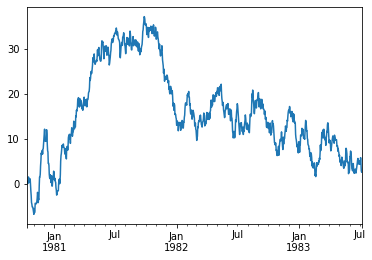

In [79]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('10/11/1980', periods=1000, freq='D'))
ts.cumsum().plot()

<AxesSubplot:>

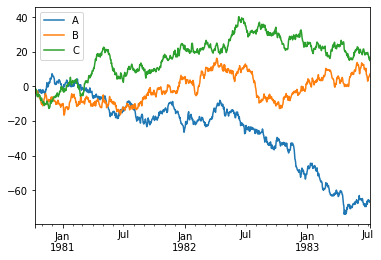

In [89]:
pdf=pd.DataFrame(np.random.randn(1000,3), index=ts.index, columns=['A','B','C'])
pdf.cumsum().plot()